# Question 11.1

Using the crime data set uscrime.txt from Questions 8.2, 9.1, and 10.1, build a regression model using:
1.	Stepwise regression
2.	Lasso
3.	Elastic net
For Parts 2 and 3, remember to scale the data first – otherwise, the regression coefficients will be on different scales and the constraint won’t have the desired effect.

For Parts 2 and 3, use the glmnet function in R.  

Notes on R:
•	For the elastic net model, what we called λ in the videos, glmnet calls “alpha”; you can get a range of results by varying alpha from 1 (lasso) to 0 (ridge regression) [and, of course, other values of alpha in between].
•	In a function call like glmnet(x,y,family=”mgaussian”,alpha=1) the predictors x need to be in R’s matrix format, rather than data frame format.  You can convert a data frame to a matrix using as.matrix – for example, x <- as.matrix(data[,1:n-1])
•	Rather than specifying a value of T, glmnet returns models for a variety of values of T. 


In [6]:
library(caret)
library(glmnet)

Loading required package: ggplot2

Loading required package: lattice



In [1]:
crime <- read.table("uscrime.txt", header=TRUE)

In [2]:
head(crime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


---

## Stepwise Regression

trControl Source: https://www.rdocumentation.org/packages/caret/versions/2.27/topics/train

In [9]:
set.seed(1)

train_rows <- sample(1:nrow(crime),as.integer(0.7*nrow(crime),replace=F))

train = crime[train_rows,]

test = crime[-train_rows,]

train_control <- trainControl(method ="cv", number =10)

stepwise <- train(Crime ~., data = traindata , method ="lmStepAIC", trControl = train_control,trace=F)

stepwise$results

,parameter,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,288.2475,0.5719718,243.4167,100.7487,0.3265177,81.8981


In [10]:
stepwise$finalModel


Call:
lm(formula = .outcome ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
    Prob, data = dat)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
   -6557.63        87.10       173.41        98.34        27.00     -7394.41  
         U2         Ineq         Prob  
     206.41        56.57     -3489.88  


In [11]:
summary(stepwise)


Call:
lm(formula = .outcome ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
    Prob, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.19 -116.92   -4.76  127.15  474.12 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6557.63    1359.17  -4.825 3.09e-05 ***
M              87.10      34.76   2.506 0.017312 *  
Ed            173.41      55.87   3.104 0.003903 ** 
Po1            98.34      16.22   6.064 7.99e-07 ***
M.F            27.00      15.20   1.777 0.084851 .  
U1          -7394.41    3702.00  -1.997 0.054080 .  
U2            206.41      77.94   2.648 0.012312 *  
Ineq           56.57      15.02   3.766 0.000651 ***
Prob        -3489.88    1578.65  -2.211 0.034100 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 33 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7358 
F-statistic: 15.27 on 8 and 33 DF,  p-value: 4.342e-09


---

## LASSO

In [12]:
xtrain<-scale(as.matrix(train)[,-16], center =TRUE, scale =TRUE)

ytrain<-scale(as.matrix(train)[,16], center =TRUE, scale =TRUE)

xtest<-scale(as.matrix(test)[,-16], center =TRUE, scale =TRUE)

ytest<-scale(as.matrix(test)[,16], center =TRUE, scale =TRUE)

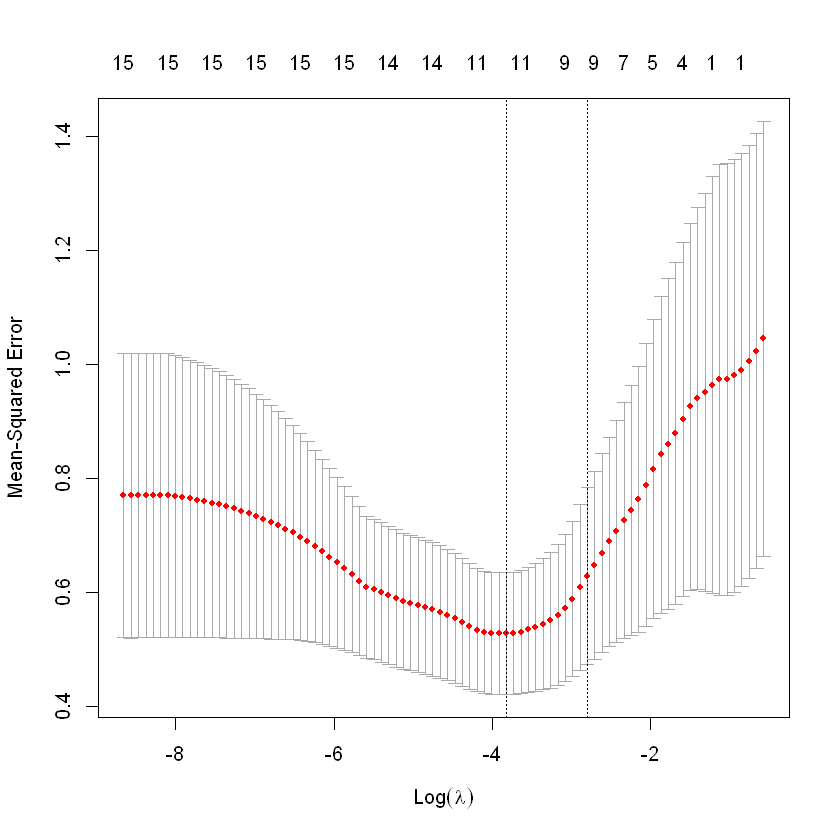

In [18]:
lasso_cv <- cv.glmnet(xtrain, ytrain, family="gaussian", alpha=1)
plot(lasso_cv)

---

## Elastic Net

In [20]:
train_cont <- trainControl(method ="repeatedcv", number =10, repeats =5, search ="random", verboseIter =F)

elastic_reg <- train(Crime ~ .,data = as.matrix(scale(train)),method ="glmnet",preProcess = c("center","scale"), tuneLength =10,trControl = train_cont)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [21]:
elastic_reg$bestTune

,alpha,lambda
,<dbl>,<dbl>
5,0.6785395,0.04725653


---